In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_and_visualize_hourly_data(header_lines, file_path, output_value_name):
    """
    Process hourly data, calculate daily averages, and create visualizations.
    
    Parameters:
    header_lines (int): The number of header lines to skip
    file_path (str): The path of the data file
    output_value_name (str): The name of the value column in the output DataFrame
    
    Returns:
    pd.DataFrame: Processed daily average DataFrame
    """
    
    # Process the data
    def process_hourly_data(header_lines, file_path, output_value_name):
        df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')
        
        if 'value' in df.columns:
            df_cleaned = df[(df['value'] != -999.99) & (df['value'] <= 700)] 
        else:
            df.columns = ['year', 'month', 'day', 'hour', 'minute', 'value', 'std']
            df = df.drop(columns=['minute', 'std'])
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            df_cleaned = df[~df['value'].isna()]
            df_cleaned = df_cleaned[df_cleaned['value'] <= 700] 
        
        daily_avg = (
            df_cleaned.groupby(['year', 'month', 'day'])['value']
            .mean()
            .round(3)
            .reset_index()
            .rename(columns={'value': output_value_name}) 
        )
        
        return daily_avg
    
    # Process the data
    result = process_hourly_data(header_lines, file_path, output_value_name)
    # print(result)
    
    # Create datetime index
    result['date'] = pd.to_datetime(result[['year', 'month', 'day']])
    result.set_index('date', inplace=True)
    result.sort_index(inplace=True)
    
    return result

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/dr/6j37tcfd6lg9zbmw4fsj75nr0000gn/T/ipykernel_5897/2659708247.py:20: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, skiprows=header_lines, header=0, sep='\s+')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_boxplot(sites_data, max_threshold=800):

    all_data = []
    
    for site_name, df in sites_data.items():

        matching_cols = [col for col in df.columns if col.lower() == site_name.lower()]
        
        if not matching_cols:
            raise ValueError(f"in{site_name} not found")
            
        value_col = matching_cols[0]  
        
        temp_df = df[[value_col]].copy()
        temp_df['Site'] = site_name 
        temp_df = temp_df.rename(columns={value_col: 'Value'})
        all_data.append(temp_df)
    
    combined_df = pd.concat(all_data)
    
    plt.figure(figsize=(6, 8))
    sns.set(style="whitegrid", palette="pastel")

    combined_df = combined_df[combined_df['Value'] <= max_threshold]
  
    return combined_df

sites_data = {
    'AMT' : process_and_visualize_hourly_data(161, 'co2_amt_tower-insitu_1_ccgg_HourlyData.txt', 'amt'),
    'BAO' : process_and_visualize_hourly_data(165, 'co2_bao_tower-insitu_1_ccgg_HourlyData.txt', 'bao'),
    'BRW' : process_and_visualize_hourly_data(164, 'co2_brw_surface-insitu_1_ccgg_HourlyData.txt', 'brw'),
    'CRV' : process_and_visualize_hourly_data(196, 'co2_crv_tower-insitu_1_ccgg_HourlyData.txt', 'crv'),
    'LEF' : process_and_visualize_hourly_data(188, 'co2_lef_tower-insitu_1_ccgg_HourlyData.txt', 'lef'),
    'MBO' : process_and_visualize_hourly_data(160, 'co2_mbo_surface-insitu_1_ccgg_HourlyData.txt', 'mbo'),
    'MLO' : process_and_visualize_hourly_data(165, 'co2_mlo_surface-insitu_1_ccgg_HourlyData.txt', 'mlo'),
    'SCT' : process_and_visualize_hourly_data(168, 'co2_sct_tower-insitu_1_ccgg_HourlyData.txt', 'sct'),
    'SMO' : process_and_visualize_hourly_data(164, 'co2_smo_surface-insitu_1_ccgg_HourlyData.txt', 'smo'),
    'SNP' : process_and_visualize_hourly_data(167, 'co2_snp_surface-insitu_1_ccgg_HourlyData.txt', 'snp'),
    'SPO' : process_and_visualize_hourly_data(164, 'co2_spo_surface-insitu_1_ccgg_HourlyData.txt', 'spo'),
    'WBI' : process_and_visualize_hourly_data(162, 'co2_wbi_tower-insitu_1_ccgg_HourlyData.txt', 'wbi'),
    'WGC' : process_and_visualize_hourly_data(204, 'co2_wgc_tower-insitu_1_ccgg_HourlyData.txt', 'wgc'),
    'WKT' : process_and_visualize_hourly_data(156, 'co2_wkt_tower-insitu_1_ccgg_HourlyData.txt', 'wkt')
}

combined_data = plot_combined_boxplot(sites_data, max_threshold=800)




过滤前数据量: 121714
过滤后数据量: 121714
过滤掉的数据量: -29258


<Figure size 600x800 with 0 Axes>

In [3]:
pivot_dfs = []

for site_name, df in sites_data.items():

    value_col = [col for col in df.columns if col.lower() == site_name.lower()][0]
    
    site_series = df[value_col].rename(site_name)
    pivot_dfs.append(site_series)

corr_df = pd.concat(pivot_dfs, axis=1)

print(corr_df.head())

宽表数据样例：
            AMT  BAO      BRW  CRV  LEF  MBO  MLO  SCT  SMO  SNP  SPO  WBI  \
date                                                                         
1973-07-24  NaN  NaN  325.555  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-25  NaN  NaN  325.453  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-26  NaN  NaN  326.150  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-27  NaN  NaN  325.434  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1973-07-28  NaN  NaN  324.445  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

            WGC  WKT  
date                  
1973-07-24  NaN  NaN  
1973-07-25  NaN  NaN  
1973-07-26  NaN  NaN  
1973-07-27  NaN  NaN  
1973-07-28  NaN  NaN  


In [4]:
def iqr_outlier_processing(df, multiplier=1.0):

    processed_df = df.copy()
    outlier_stats = {}
    
    for column in df.columns:

        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        
        is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = is_outlier.sum()
        
        processed_df[column] = df[column].mask(is_outlier).interpolate()
        
        outlier_stats[column] = {
            'lower_bound': round(lower_bound, 2),
            'upper_bound': round(upper_bound, 2),
            'outliers': outlier_count,
            'percentage': round(outlier_count / len(df) * 100, 2)
        }
    
    return processed_df, outlier_stats

# corr_df, stats = iqr_outlier_processing(corr_df)

# print("{:<5} {:<10} {:<10} {:<10} {:<10}".format(
#     "Site", "Lower", "Upper", "Outliers", "Percent%"))
# for site, data in stats.items():
#     print("{:<5} {:<10.2f} {:<10.2f} {:<10} {:<10.2f}%".format(
#         site, data['lower_bound'], data['upper_bound'], 
#         data['outliers'], data['percentage']))

Site  Lower      Upper      Outliers   Percent%  
AMT   371.47     440.29     60         0.32      %
BAO   383.46     418.29     89         0.47      %
BRW   303.31     441.39     1          0.01      %
CRV   392.62     434.75     35         0.19      %
LEF   367.48     438.27     48         0.26      %
MBO   385.88     434.83     5          0.03      %
MLO   304.55     437.42     0          0.00      %
SCT   383.82     440.86     49         0.26      %
SMO   307.39     433.34     0          0.00      %
SNP   376.69     438.28     100        0.53      %
SPO   308.61     433.01     1          0.01      %
WBI   375.19     443.83     129        0.69      %
WGC   379.04     447.21     145        0.77      %
WKT   367.90     444.80     7          0.04      %


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def run_shared_model(corr_df, window_size=30, epochs=30):
    all_series = {}
    scaler = MinMaxScaler()

    X_all, y_all = [], []
    for station in corr_df.columns:
        series = corr_df[station].dropna()
        if len(series) < window_size + 1:
            continue
        scaled = scaler.fit_transform(series.values.reshape(-1, 1)).flatten()
        for i in range(window_size, len(scaled)):
            X_all.append(scaled[i - window_size:i])
            y_all.append(scaled[i])
        all_series[station] = series

    X_train = np.array(X_all).reshape(-1, window_size, 1)
    y_train = np.array(y_all)

    model = Sequential([
        LSTM(64, input_shape=(window_size, 1), return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(0.001))
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

    station_mse_results = {}
    for station, series in all_series.items():
        scaled = scaler.fit_transform(series.values.reshape(-1, 1)).flatten()
        X_test, y_test = [], []
        for i in range(window_size, len(scaled)):
            X_test.append(scaled[i - window_size:i])
            y_test.append(scaled[i])
        X_test = np.array(X_test).reshape(-1, window_size, 1)
        y_test = np.array(y_test)

        pred_scaled = model.predict(X_test).flatten()
        y_pred = scaler.inverse_transform(pred_scaled.reshape(-1, 1)).flatten()
        y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

        mse = mean_squared_error(y_true, y_pred)
        station_mse_results[station] = round(mse, 2)

    return pd.DataFrame.from_dict(station_mse_results, orient='index', columns=['MSE (ppm)']).sort_values(by='MSE (ppm)')


In [6]:
results_df = run_shared_model(corr_df, window_size=30, epochs=30)
print(results_df)


Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4239/4239 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0076
Epoch 2/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0022
Epoch 3/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 4/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 5/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0021
Epoch 6/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 7/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 8/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 9/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 10/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 11/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 12/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 13/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 14/30
4239/4239 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0020
Epoch 15/30
4239/4239 ━━━━

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def add_shared_aux_features(corr_df, window=7):
    df = corr_df.copy()
    feature_df = pd.DataFrame(index=df.index)
    for station in df.columns:
        rolling = df[station].rolling(window=window, min_periods=1)
        feature_df[f'{station}_mean_7'] = rolling.mean().shift(1)
        feature_df[f'{station}_std_7'] = rolling.std(ddof=0).shift(1)
    return feature_df

def build_shared_model_with_aux(input_shape_seq, input_shape_aux):
    seq_input = Input(shape=input_shape_seq)
    aux_input = Input(shape=input_shape_aux)

    x = LSTM(64, return_sequences=False)(seq_input)
    x = Dropout(0.2)(x)
    x = Concatenate()([x, aux_input])
    x = Dense(32, activation='relu')(x)
    output = Dense(1)(x)

    model = Model(inputs=[seq_input, aux_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def train_shared_model_with_aux(corr_df, window=30, aux_window=7, epochs=30):
    aux_df = add_shared_aux_features(corr_df, window=aux_window)
    scaler = MinMaxScaler()
    all_series = {}
    X_seq_all, X_aux_all, y_all = [], [], []

    for station in corr_df.columns:
        df_station = corr_df[[station]].join(aux_df, how='inner')
        df_station = df_station.dropna()

        if len(df_station) < window + 1:
            continue

        series = scaler.fit_transform(df_station[station].values.reshape(-1, 1)).flatten()
        aux_values = df_station.drop(columns=[station]).values

        for i in range(window, len(series)):
            X_seq_all.append(series[i - window:i])
            X_aux_all.append(aux_values[i])
            y_all.append(series[i])

        all_series[station] = (series, aux_values)

    X_seq = np.array(X_seq_all).reshape(-1, window, 1)
    X_aux = np.array(X_aux_all)
    y = np.array(y_all)

    model = build_shared_model_with_aux((window, 1), (X_aux.shape[1],))
    model.fit([X_seq, X_aux], y, epochs=epochs, batch_size=32, verbose=1)

    station_mse_results = {}
    for station, (series, aux_values) in all_series.items():
        X_test, A_test, y_test = [], [], []
        for i in range(window, len(series)):
            X_test.append(series[i - window:i])
            A_test.append(aux_values[i])
            y_test.append(series[i])
        X_test = np.array(X_test).reshape(-1, window, 1)
        A_test = np.array(A_test)
        y_test = np.array(y_test)

        preds = model.predict([X_test, A_test], verbose=0).flatten()
        y_pred = scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
        y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        mse = mean_squared_error(y_true, y_pred)
        station_mse_results[station] = round(mse, 2)

    return pd.DataFrame.from_dict(station_mse_results, orient='index', columns=['MSE (ppm)']).sort_values(by='MSE (ppm)')


In [8]:
results = train_shared_model_with_aux(corr_df, window=30, aux_window=7, epochs=30)
print(results)


Epoch 1/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 23.0972
Epoch 2/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1201
Epoch 3/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0002
Epoch 4/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8358
Epoch 5/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6209
Epoch 6/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4359
Epoch 7/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4136
Epoch 8/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3605
Epoch 9/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3232
Epoch 10/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2772
Epoch 11/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2814
Epoch 12/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3047
Epoch 13/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2388
Epoch 14/30
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2571
Epoch 15/30
1585/1585 ━━━━━━

In [9]:
def build_super_shared_model_with_aux(input_shape_seq, input_shape_aux):
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
    from tensorflow.keras.optimizers import Adam

    seq_input = Input(shape=input_shape_seq)
    aux_input = Input(shape=input_shape_aux)

    x = LSTM(128, return_sequences=True)(seq_input)
    x = Dropout(0.15)(x)
    x = LSTM(128, return_sequences=True)(x)
    x = Dropout(0.15)(x)
    x = LSTM(64, return_sequences=False)(x)
    x = Dropout(0.1)(x)
    x = Concatenate()([x, aux_input])
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(1)(x)

    model = Model(inputs=[seq_input, aux_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model


In [15]:
def train_super_shared_model_with_aux(corr_df, window=30, aux_window=7, epochs=100):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error

    def add_shared_aux_features(corr_df, window=7):
        df = corr_df.copy()
        feature_df = pd.DataFrame(index=df.index)
        for station in df.columns:
            rolling = df[station].rolling(window=window, min_periods=1)
            feature_df[f'{station}_mean_7'] = rolling.mean().shift(1)
            feature_df[f'{station}_std_7'] = rolling.std(ddof=0).shift(1)
        return feature_df

    aux_df = add_shared_aux_features(corr_df, window=aux_window)
    scaler = MinMaxScaler()
    all_series = {}
    X_seq_all, X_aux_all, y_all = [], [], []

    for station in corr_df.columns:
        df_station = corr_df[[station]].join(aux_df, how='inner')
        df_station = df_station.dropna()

        if len(df_station) < window + 1:
            continue

        series = scaler.fit_transform(df_station[station].values.reshape(-1, 1)).flatten()
        aux_values = df_station.drop(columns=[station]).values

        for i in range(window, len(series)):
            X_seq_all.append(series[i - window:i])
            X_aux_all.append(aux_values[i])
            y_all.append(series[i])

        all_series[station] = (series, aux_values)

    X_seq = np.array(X_seq_all).reshape(-1, window, 1)
    X_aux = np.array(X_aux_all)
    y = np.array(y_all)

    model = build_super_shared_model_with_aux((window, 1), (X_aux.shape[1],))
    model.fit([X_seq, X_aux], y, epochs=epochs, batch_size=32, verbose=1)

    station_mse_results = {}
    for station, (series, aux_values) in all_series.items():
        X_test, A_test, y_test = [], [], []
        for i in range(window, len(series)):
            X_test.append(series[i - window:i])
            A_test.append(aux_values[i])
            y_test.append(series[i])
        X_test = np.array(X_test).reshape(-1, window, 1)
        A_test = np.array(A_test)
        y_test = np.array(y_test)

        preds = model.predict([X_test, A_test], verbose=0).flatten()
        y_pred = scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
        y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        mse = mean_squared_error(y_true, y_pred)
        station_mse_results[station] = round(mse, 2)

    return (
        pd.DataFrame.from_dict(station_mse_results, orient='index', columns=['MSE (ppm)']).sort_values(by='MSE (ppm)'),
        model,
        all_series,
        scaler
    )



In [17]:
results, model, all_series, scaler = train_ultra_shared_model_with_aux(corr_df, window=30, aux_window=7, epochs=100)

print(results)


Epoch 1/100
 645/1585 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - loss: 618.6105

KeyboardInterrupt: 

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam

def add_shared_aux_features(corr_df, window=7):
    df = corr_df.copy()
    feature_df = pd.DataFrame(index=df.index)
    for station in df.columns:
        rolling = df[station].rolling(window=window, min_periods=1)
        feature_df[f'{station}_mean_7'] = rolling.mean().shift(1)
        feature_df[f'{station}_std_7'] = rolling.std(ddof=0).shift(1)
    return feature_df

def build_ultra_shared_model_with_aux(input_shape_seq, input_shape_aux):
    seq_input = Input(shape=input_shape_seq)
    aux_input = Input(shape=input_shape_aux)

    x = LSTM(128, return_sequences=True)(seq_input)
    x = Dropout(0.15)(x)
    x = LSTM(128, return_sequences=True)(x)
    x = Dropout(0.15)(x)
    x = LSTM(128, return_sequences=True)(x)
    x = Dropout(0.1)(x)
    x = LSTM(64, return_sequences=False)(x)
    x = Dropout(0.1)(x)
    x = Concatenate()([x, aux_input])
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(1)(x)

    model = Model(inputs=[seq_input, aux_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def train_ultra_shared_model_with_aux(corr_df, window=30, aux_window=7, epochs=100):
    aux_df = add_shared_aux_features(corr_df, window=aux_window)
    scaler = MinMaxScaler()
    all_series = {}
    X_seq_all, X_aux_all, y_all = [], [], []

    for station in corr_df.columns:
        df_station = corr_df[[station]].join(aux_df, how='inner').dropna()
        if len(df_station) < window + 1:
            continue
        series = scaler.fit_transform(df_station[station].values.reshape(-1, 1)).flatten()
        aux_values = df_station.drop(columns=[station]).values

        for i in range(window, len(series)):
            X_seq_all.append(series[i - window:i])
            X_aux_all.append(aux_values[i])
            y_all.append(series[i])

        all_series[station] = (series, aux_values)

    X_seq = np.array(X_seq_all).reshape(-1, window, 1)
    X_aux = np.array(X_aux_all)
    y = np.array(y_all)

    model = build_ultra_shared_model_with_aux((window, 1), (X_aux.shape[1],))
    model.fit([X_seq, X_aux], y, epochs=epochs, batch_size=32, verbose=1)

    station_mse_results = {}
    for station, (series, aux_values) in all_series.items():
        X_test, A_test, y_test = [], [], []
        for i in range(window, len(series)):
            X_test.append(series[i - window:i])
            A_test.append(aux_values[i])
            y_test.append(series[i])
        X_test = np.array(X_test).reshape(-1, window, 1)
        A_test = np.array(A_test)
        y_test = np.array(y_test)

        preds = model.predict([X_test, A_test], verbose=0).flatten()
        y_pred = scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
        y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        mse = mean_squared_error(y_true, y_pred)
        station_mse_results[station] = round(mse, 2)

    return (
        pd.DataFrame.from_dict(station_mse_results, orient='index', columns=['MSE (ppm)']).sort_values(by='MSE (ppm)'),
        model,
        all_series,
        scaler
    )


In [26]:
results, model, all_series, scaler = train_ultra_shared_model_with_aux(
    corr_df, window=30, aux_window=7, epochs=100
)


Epoch 1/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - loss: 53.1496
Epoch 2/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.6029
Epoch 3/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.2946
Epoch 4/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - loss: 0.1365
Epoch 5/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - loss: 2.7201
Epoch 6/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - loss: 0.0486
Epoch 7/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.0158
Epoch 8/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.0131
Epoch 9/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - loss: 0.0093
Epoch 10/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - loss: 0.0121
Epoch 11/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.0104
Epoch 12/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - loss: 0.0093
Epoch 13/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - loss: 0.0078
Epoch 14/100
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step -

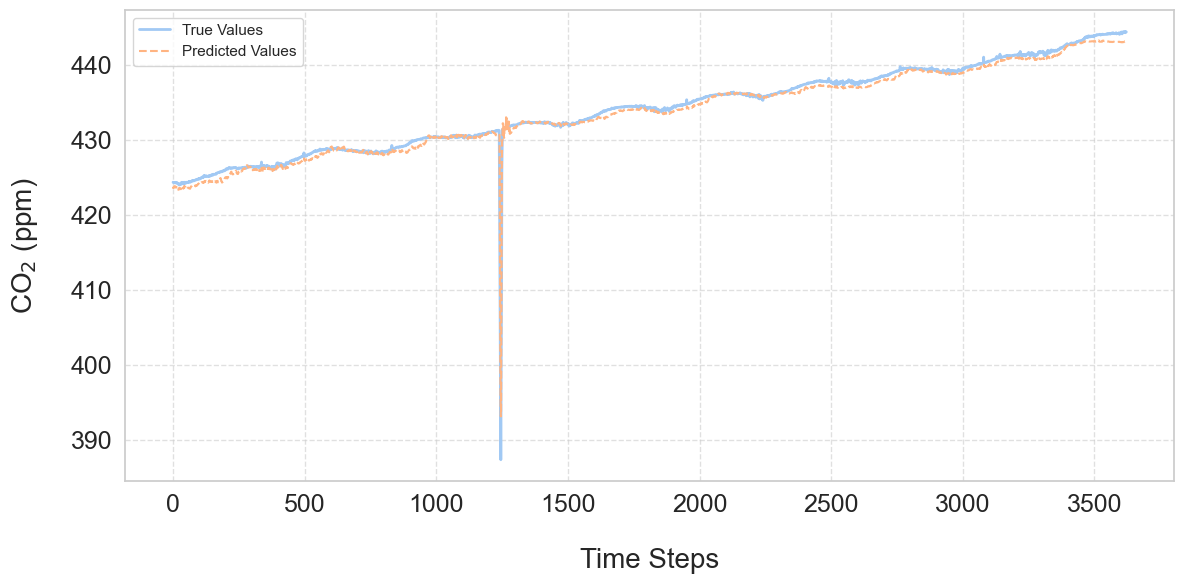

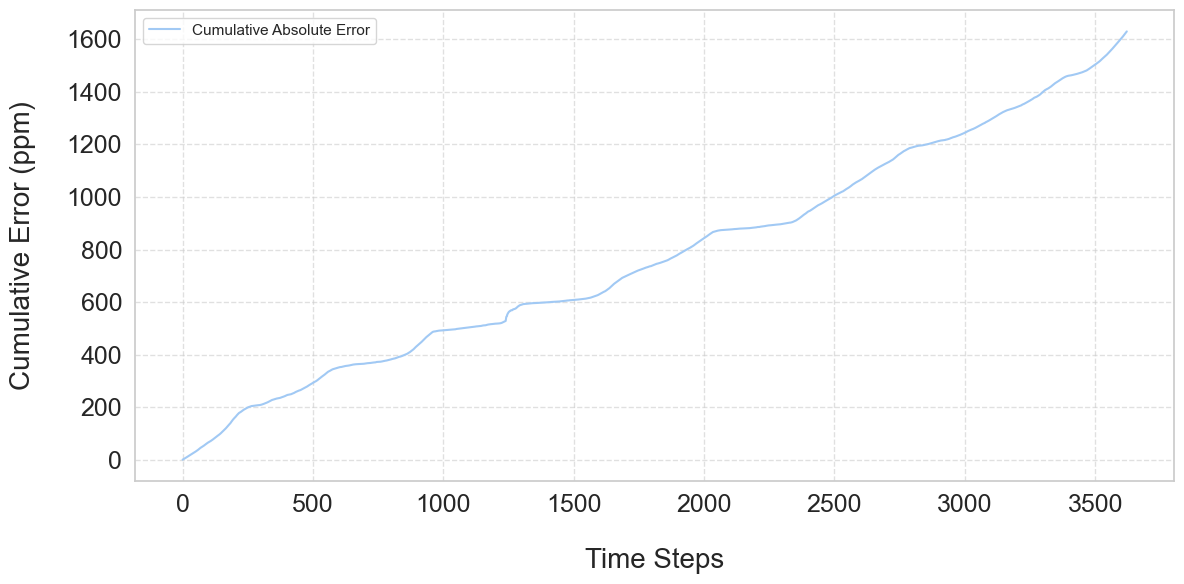

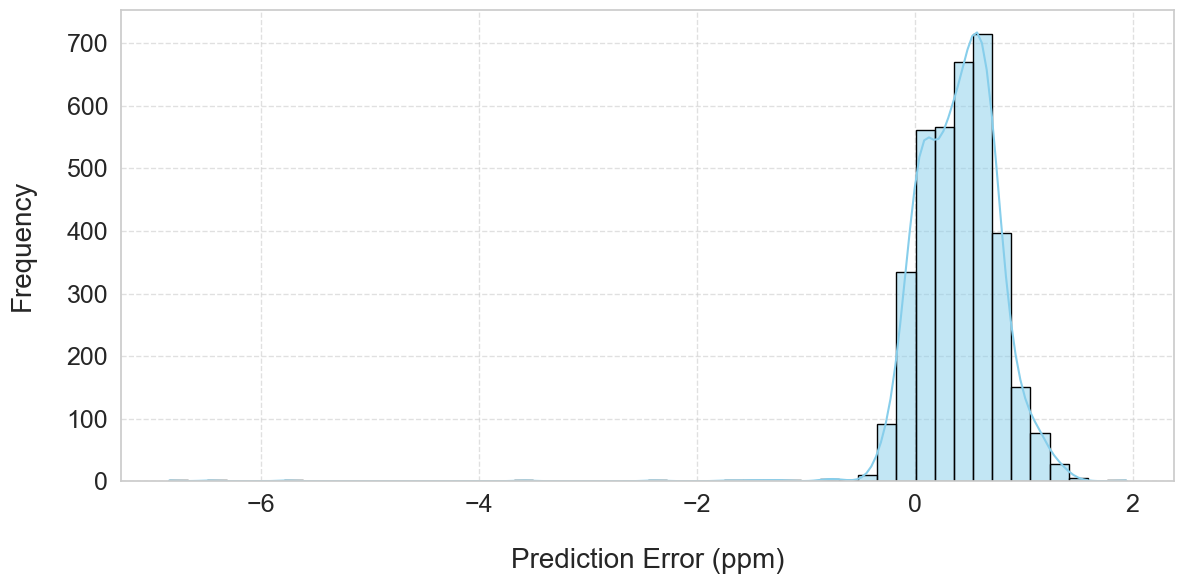

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

station = 'SPO'
window = 30
）
series, aux_values = all_series[station]
X_test, A_test, y_test = [], [], []

for i in range(window, len(series)):
    X_test.append(series[i - window:i])
    A_test.append(aux_values[i])
    y_test.append(series[i])

X_test = np.array(X_test).reshape(-1, window, 1)
A_test = np.array(A_test)
y_test = np.array(y_test)

y_pred_scaled = model.predict([X_test, A_test], verbose=0).flatten()

y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
residuals = y_true - y_pred

plt.figure(figsize=(12, 6))
plt.plot(y_true, label='True Values', linewidth=2)
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Time Steps', fontsize=20, labelpad=22)
plt.ylabel('CO$_2$ (ppm)', fontsize=20, labelpad=22)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(np.abs(residuals)), label='Cumulative Absolute Error')
plt.xlabel('Time Steps', fontsize=20, labelpad=22)
plt.ylabel('Cumulative Error (ppm)', fontsize=20, labelpad=22)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Error (ppm)', fontsize=20, labelpad=22)
plt.ylabel('Frequency', fontsize=20, labelpad=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
